## Regression
[def.] a statistical aproach to establish the relationship among variables

basicaly two ways of training any regression model:

using a direct equation form **closed-form eqution approach**
using iterative optimization approach (e.g. Gradient Descent, SGD, etc)

## linear regression:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# loading the dataset
data = pd.read_csv("C:/Users/Geethika Reddy/Downloads/heights-and-weights/data.csv")
data.head()


,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [27]:
#prepare the data:
X=data.loc[:,:"Height"]
y=data.loc[:,:"Weight"]

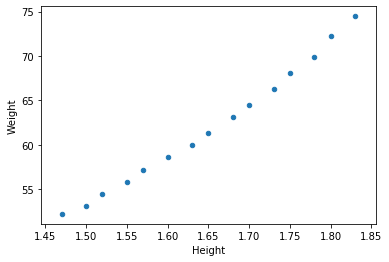

In [28]:
#plot it out

data.plot(kind="scatter",x="Height",y="Weight")
plt.show()

general equation for any straight line **y = c + mx**<br>
$$ Height = \theta_{0} + \theta_{1} * Weight $$
where  θ0  and  θ1  are our ML model's parameters (i.e., HEight & Weight)<br>

how to measure the performance for this ML model that we'll build?<br>

 ## cost function / utility function / fitness function
 
for most regression, the **cost function** is usually the measure of distance b/w the predicted value and the actual value.<br>

various ways to evaluate the performance of a model:<br>

**Root Mean Squared Error (RMSE)** RMSE basically gives an idea of how much the error your ML system is making in its prediction.<br>

$$ RMSE(X,f) = \sqrt{\frac{1}{m}\sum_{i=0}^{m}(f(x^i)-y^2}$$

where m : total no. of instances<br>
f: hypothesis function/Model prediction function<br>
f(x): predicted value after going through prediction function<br>
y: actual target value<br>
xi :  ith  element of the feature vector x<br>

**Mean Squared Error (MSE)** practically similar to RMSE except for the sqaure root<br>

**Mean Absolute Error (MAE)** gives you the same idea of how much your predicted values is deviating from the actual values.<br>
**The only difference is in the way the distances are calculated in RMSE/MSE and MAE<br>
$$ MAE(X,f) = \frac{1}{m}\sum_{i=1}^{m}|f(x^{i}) - y^{i})|$$

RMSE basically uses **Euclidean distance approach.** Also called as **l2 norm of measuring distances.**
MAE uses **Manhattan distance approach.** Also called as **l1 norms of measuring distances.**<br>

there are other higher order norms of measuring these distances and as we go along increasing the norm (something like  lk  norm ) these functions start focusing more on larger values and kind of start ignoring the smaller values<br>

therefore, **RMSE is more sensitive to outliers than MAE**<br>

[NOTE] when we have exponentially less outliers, then even RMSE performs well.<br>

In [29]:
## training our model:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
#to get the intercept value:

lr.intercept_

array([ 4.44089210e-16, -3.90619559e+01])

In [41]:
#to get the coeffecient:
lr.coef_

array([[ 1.        ],
       [61.27218654]])

so for our case, the most optimal parameter would be  $$\theta_{0}=4.44 and \theta_{1}= 1$$

In [46]:
 #predicting Weight given some Height

some_gdp = [[1.7]] #height
lr.predict(some_gdp)

array([[ 1.7      , 65.1007612]])

65.100 is the predicted weight

The Normal equation
to find the best value for out  θ  that would minimize the cost function to its least, we use a mathematical approach called The Normal Equation
$$ \hat{\theta} = (X^{T}.X)^{-1}.X^{T}.y $$

where $\hat{\theta}$:value that minimizes the cost function<br>
    X: feature vector<br>
    y: target value

In [47]:
# lets generate some random linear dataset

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100, 1)

this is basically,<br>

$$ y=4 + 3x+{0} + someNoise $$

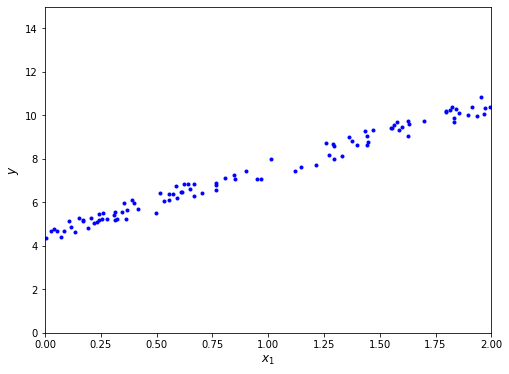

In [49]:
plt.figure(figsize=(8,6))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.axis([0, 2, 0, 15])

plt.show()

In [50]:
X_b = np.c_[np.ones((100, 1)), X] # adding x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # normal eq.

In [51]:
theta_best

array([[4.52648841],
       [3.03581829]])

In [52]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # adding x0=1 bias to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.52648841],
       [10.59812498]])

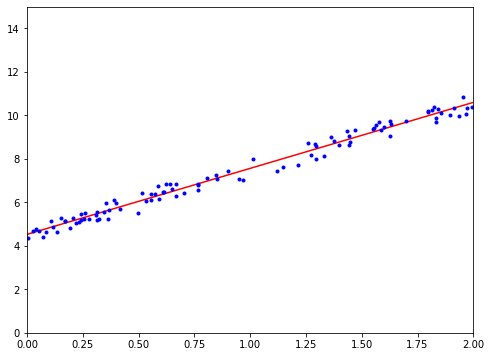

In [53]:
plt.figure(figsize=(8,6))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## Gradient Descent:
Gradient Descent is basically generic optimizatio algorithm capable of finding the optimal solution to wide range of problems.<br>

[story inside it] the general idea of GD is to tweak your parameters of a model iteratively so as to minimize its cost function.<br>


**what values shoud  θ  have initially?** well we start out filling int random values for our model parameters. this is also called random initialization<br>

remember the baby steps the man takes to descent down the hill thats what we call **learning rate**<br>

**if your learning rate is too small, your model will have to go through many iterations to converge to global minima wherein your cost function is at its least**<br>

**on the other hand, if you set it out to be a large value, chances are that you jump across the valleys, you might even end up at a point thats higher than the value you had initially, this again will more time to train**<br>

ideally people experiment out with diff diff values for the learning rate.<br>

**BONUS** the MSE is originally a convex function in nature.<br>

**TIP** if you scale your feature vectors to the same scale, you have chances you reaching the minima for your cost function at the eariest.

In [54]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.52648841]), array([[3.03581829]]))

In [55]:
lin_reg.predict(X_new)

array([[ 4.52648841],
       [10.59812498]])

## Feature Scaling
[core idea] whenever you have numerical attributes all in diff diff ranges (e.g. 10% - 54%, 0.12 to 0.99. 28 to 34324),
you would want to bring all these numerical attributes onto the same scale. That's when you do feature scaling.<br>

two most common approaches are:<br>

Min-Max Scaling : you shift every numerical attirbute b/w a min and a max range.<br>
Normalization/ Standard Scaling : you subtract every numerical attirbute with its minimum and then yu divide it out unit variance.<br>
    
   

 $$Z_{min-max scalling} = \frac{x - min(x)}{max(x) - min(x))}$$
    
    from sklearn.preprocessing import MinMaxScaler<br>
    
  

  $$Z_{normalization} = \frac{X - \mu}{\sigma}$$
    
    from sklearn.preprocessing import StandardScaler<br>
    
    where  μ  is mean<br>
      X: feature vector<br>
      σ  is standard deviation

## Batch Gradient Descent:
to implement any GD, we first calculate the gradient of the cost function w.r.t the model parameters $\theta_{i}$ <br>
in other words how much will our cost func change in its magnitude when we slightly change the values  $\theta_{i}$ .<br>

this is actually achieved through partial derivation of the changes in cost function<br>

$$\frac{\delta}{\delta\theta_{j}}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^{T}.x^{i}-y^{i}.x^{i}_{j})$$

**gradient vector of the cost function**

$$\triangledown_{\theta}MSE(\theta) = \frac{2}{m}X^{T}.(X.\theta - y)$$

this will basically point you to the uphill, but our goal is to descend or reach the minima, therefore, we'll go in the opposite direction of the uphill. Hence, the formula for next gradient descent step will be:<br>

$$\theta^{next step} = \theta - \alpha\triangledown_{\theta}MSE(\theta)$$

where $\alpha\triangledown_{\theta}MSE(\theta)$ is your **size of the step**<br>
α  is learning rate


## Stochastic Gradient Descent
[core idea] the problem with BGD, is that it uses the whole training set to compute the gradient at each step, which makes it very slow to train on larger dataset.<br>
SGD just picks some random instance in the training set and then computes the gradient of the cost function at that single instance. so less comutation in tweaking our model parameters (bcz this is a tweak just across one instance & not the entire parameters of the entire dataset). Hence its faster at reaching you global minima!<br>

stochastic means random.<br>

SGD more preferred ove BGD<br>

## Mini Batch Gradient Descent
it just grabs a smalled sub-set of the entire dataset (called batch) and then computes the gradient descent for the cost function for this whole batch before moving ahead.

## Polynomial Regression:

$$y=ax^2 + bx +c$$(2 degree polynomial function)

[core idea] whenever there's non-linear dataset,you cant straight away fit in linear rule.you then imply a higher order 
polynomial function

In [59]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X * 2 + np.random.randn(m, 1) # quadratic equation

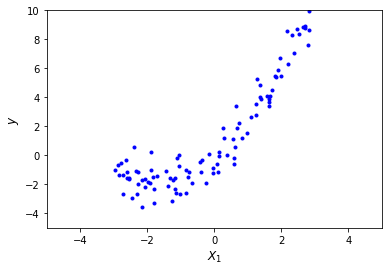

In [60]:
plt.plot(X, y, "b.")
plt.xlabel("$X_1$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.axis([-5, 5, -5, 10])
plt.show()

In [61]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

In [62]:
X[0]

array([-0.75275929])

In [63]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [64]:
in_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.21865419]), array([[1.93366893, 0.56456263]]))

predicted line also represents a fitment line thats close to the line where the data points are disbused.<br>

Our data points are disbursed at $y = 0.5x^2 + 2x + someNoise$<br>
Our predicted points are disbursed at $\hat{y} = 0.56x^2 + 1.9x + someNoise$<br>

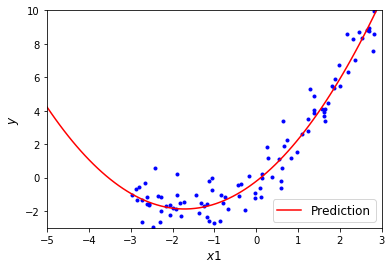

In [68]:
# plot it out

X_new = np.linspace(-5, 5, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", label="Prediction")
plt.xlabel("$x1$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.axis([-5, 3, -3, 10])
plt.legend(loc="lower right", fontsize=12)

plt.show()

In [69]:
# lets try SGD Regressor now

from sklearn.linear_model import SGDRegressor

sgd_rg = SGDRegressor(random_state=29)
sgd_rg.fit(X_poly, y)

C:\Users\Geethika Reddy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=29,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [70]:
sgd_rg.intercept_, sgd_rg.coef_

(array([-0.14022412]), array([1.93255706, 0.54160227]))

$$\frac{(n + d)!}{n!d!}$$

e.g. if there are two features a and b, and if we do polynomial transformation to degree=3, it will generate all possibilities till polynomial order of degree 3.......... **a,ab,a2,b2,ab2,a2b**<br> 

Beware increasing X feature vectors everytime to higher order degree of polynomial function, might lead to **Combinatorial explosion**

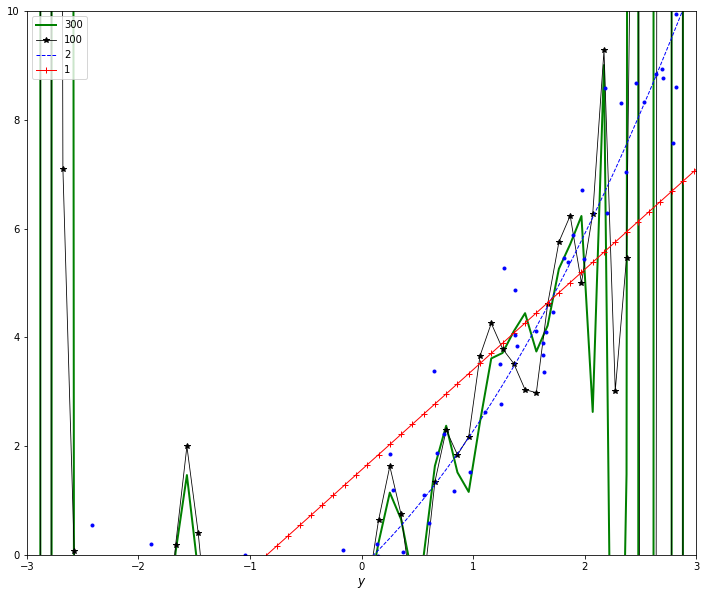

In [71]:
#let see how,

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.figure(figsize=(12,10))
for style, width, degree in (('g-', 2, 300), ('k-*', 0.8, 100), ('b--', 1, 2), ('r-+', 1, 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    polynomial_regression = Pipeline(
        [
            ("poly_features", poly_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ]
    )
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, linewidth=width, label=str(degree))
    
    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=12)
plt.xlabel("$y$", fontsize=12)
plt.axis([-3, 3, 0, 10])
plt.show()

how do you verify whether your model is generalizinf well or not?

-Cross Validation<br>
-Learning Curves

In [73]:
# example,

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_cruve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=29)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "b-", label="train")
    plt.plot(np.sqrt(val_errors), "g-", label="validation")
    plt.legend(loc="upper right", fontsize=12)
    plt.xlabel("Training set sizes", fontsize=12)
    plt.ylabel("RMSE", fontsize=12, rotation=0)

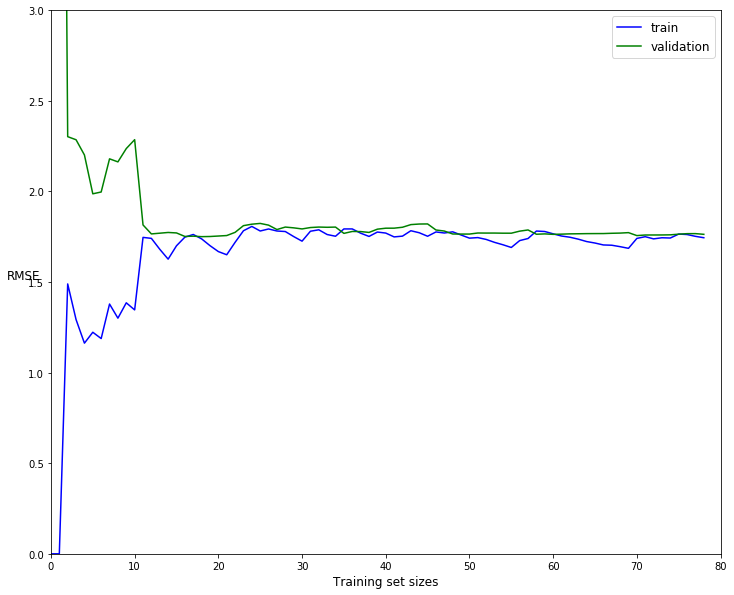

In [74]:
plt.figure(figsize=(12,10))

lin_reg = LinearRegression()
plot_learning_cruve(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()


**if your model is underfiotting the training data, adding more training examples will not really help. You will either need to use some complex model or come up with better features**

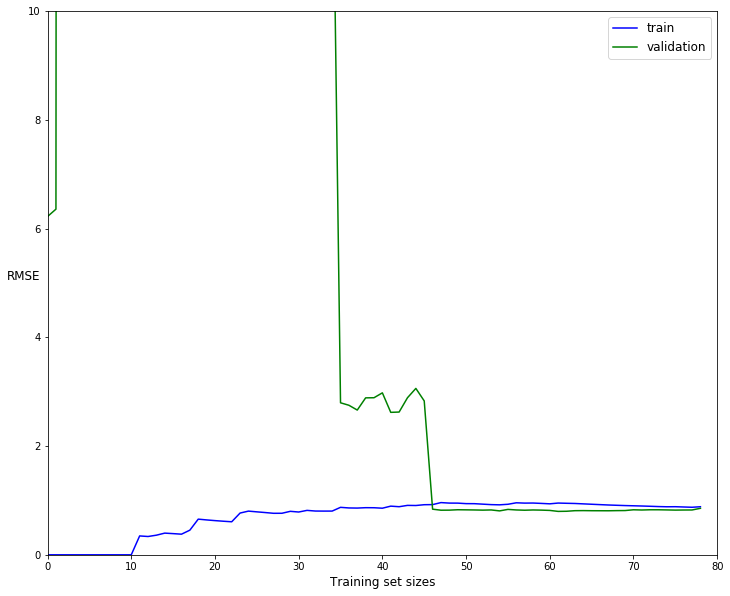

In [75]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plt.figure(figsize=(12,10))
plt.axis([0, 80, 0, 10])
plot_learning_cruve(polynomial_regression, X, y)
plt.show()

**whenever your model is performing really better on the training data than it is on validation data, its a hallmark of underfitting**<br>

One way to improve overfitting is to pass in mpre training examples, till the time your validation error reaches to a point thats quite close to your training errors.

## Bias Variance Tradeoff
[story behind it] it basically states your model's generalization error, expressed in terms of 3 different erro measures:<br>

**measures of regularizing your model:**<br>

Bias<br>
Variance<br>
Irreducible error<br>
[theory] Increasing a model's complexity will typically incraese its variance and reduce its bias. Conversely, when you're to reduce the model's complexity you're increasing its bias but reducing its variance. This is the tradeoff.<br>

### Bias:
this part of generalization error is mainly due to wrong assumption, such as assuming that the data is linear when its actually quadratic.

### Variance:
this of generalization error is due to model's sensitivity to small variations in the training data. A model with many degrees of freedom (such as the high-degree polynomial model) is very likely to overfit.

### Irreducible Error:
this part of generalization error basically represents the noisiness of the data. You can reduce it by doing data cleansing, feature enginerring, etc etc

### Regularization**

Constraining your model to make it simpler and reduce the risk of overfittting is what we call as **Regularization.**

**different ways of performing regularization:**

-Ridge Regression,<br>
-Lasso Regression<br>
-Elastic Net<br>
-Early Stoppping<br>

## Ridge Regression:
its basically a regularized version of Linear Regression.

$$ J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta_{i}^{2}$$

[NOTE] that regularization term should only be added to the cost function during training. [And not in Cross Validation Phase]

if  α=0  its basically Linear Regerssion.
if  α  is very high, then all your weights end up close to zero, and this in turn results in a flat line thats going through data's mean.

This is also called as  **l2  Regularization**

## LASSO Regression:
**(least absolute shrinkage and selection operator)**

$$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^{n}|\theta_{i}|$$

This is also called  **l1  Regularization**

Lasso basically tends to completely eliminate the weights of the least important fatures (i.e, set them to zero)<br>

This will in turn help you with important feature selection.

## Elastic Net:
**its like a middle ground b/w Ridge & Lasso Regression.**

$$J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n}|\theta{i}| + \frac{1-r}{2}\alpha\sum_{i=1}^{n}\theta_{i}^{2}$$

where  r  : mix ratio

When  r=0 , Elastic Net is actually just equivalent to Ridge Regularization,
When  r=1 , then its equivalent to Lasso Regularization

## Early Stopping:
[idea] is to train your model uptil to a point where you training & validation errors are at their minimum and before it start increasing the validation errors.